# 3.2 分类

In [1]:
import torch
import torch.nn.functional as fun
import matplotlib.pyplot as plt

### 1. 生成假数据
- **torch.normal(means, std, out=None)**：返回一个张量，包含从给定参数means,std的离散正态分布中抽取随机数。 均值means是一个张量，包含每个输出元素相关的正态分布的均值。 std是一个张量，包含每个输出元素相关的正态分布的标准差。 均值和标准差的形状不须匹配，但每个张量的元素个数须相同
- **torch.cat((A,B),0)**：表示按维数0（行）拼接tensor A和B

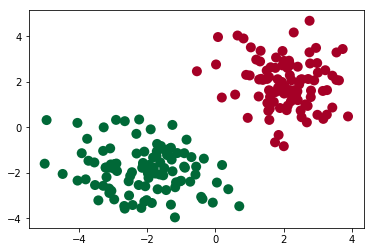

In [11]:
n_data = torch.ones(100,2) 
x0 = torch.normal(2*n_data,1) #shape=(100,2)
y0 = torch.zeros(100)         #shape=(100,1)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)
x = torch.cat((x0,x1),0).type(torch.FloatTensor) #32 bit浮点数
#print(x)
y = torch.cat((y0,y1),).type(torch.LongTensor)   #64 bit整数

plt.scatter(x.numpy()[:,0],x.numpy()[:,1],c=y.numpy(),s=100,lw=0,cmap='RdYlGn')
plt.show()

### 2. 搭建网络
**和回归问题基本一样，不同的地方有下面几处：**  
- 网络的输入是2个特征，对应一个点的横纵坐标
- 网络的输出是one-hot编码，由于该问题是二分类，因此编码大小为2
- loss function使用交叉熵损失

In [31]:
class Net(torch.nn.Module): #继承torch.nn.Module模块
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__() #继承
        #定义网络
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
    
    def forward(self,x): #前向传播
        x = torch.relu(self.hidden(x))
        x = self.predict(x) #回归最后一层一般不用激励函数
        return x
    
net = Net(2,10,2)
print(net)
optimizer = torch.optim.SGD(net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss() #交叉熵损失

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


### 3. 训练

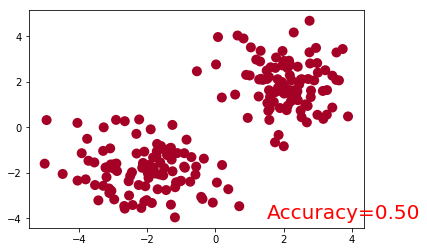

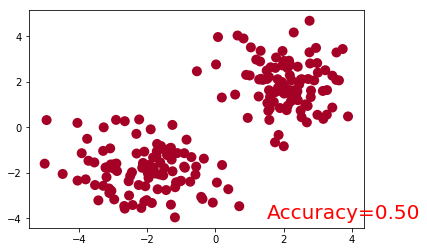

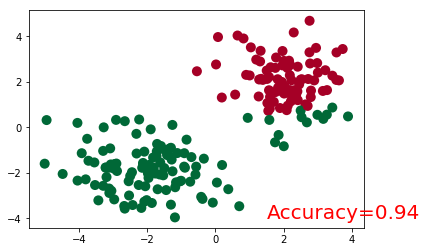

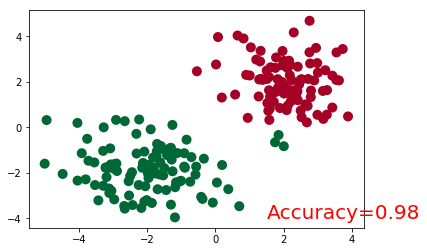

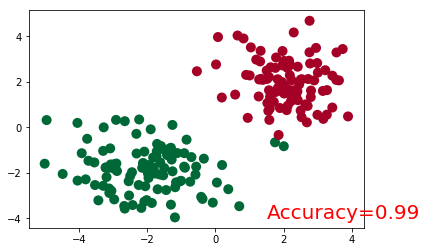

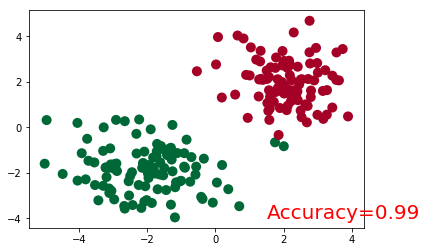

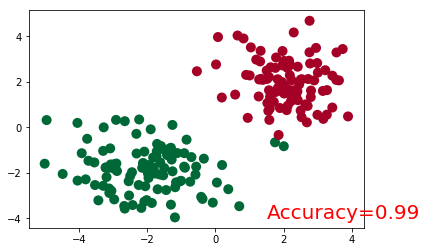

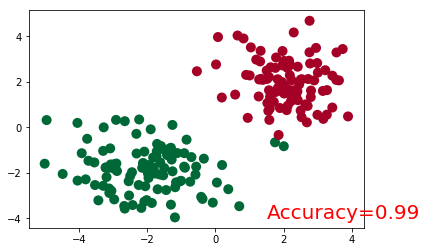

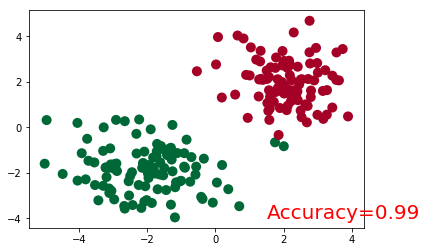

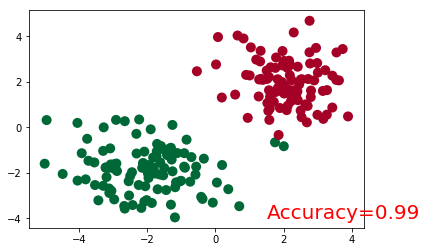

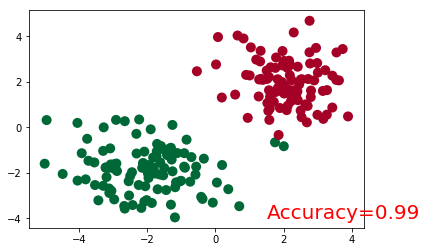

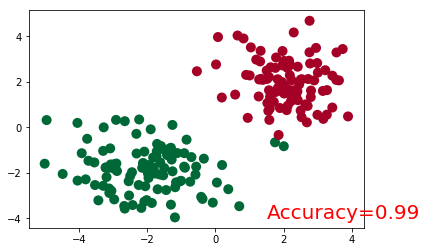

In [32]:
#%matplotlib notebook
%matplotlib inline
plt.ion() #实时显示（遇到plt.show()的时候进程不阻塞）
plt.show()

for t in range(100):
    out = net(x)
    
    loss = loss_func(out,y)
    
    optimizer.zero_grad() #梯度降为0
    loss.backward()       #反向传递，计算梯度
    optimizer.step()      #优化参数
    
    #画图
    if t % 10 == 0 or t in [3, 6]:
        plt.cla()
        #print(torch.softmax(out,dim=1)) # shape=(100,2)
        _, prediction = torch.max(torch.softmax(out,dim=1), 1) #返回第一个维度的最大值，第二个返回值是索引
        #print(prediction) #shape=(1,100)
        pred_y = prediction.data.numpy().squeeze()
        #print(pred_y)
        
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()